<a href="https://colab.research.google.com/github/NaeemHussainN/StockPricePredictor/blob/main/stock_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (META Inc.) using the past 60 day stock price.

In [12]:
# Import the libraries
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Input,Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [13]:
# Get the quote
# Using yfinance to fetch the data
quote = yf.download("META", start="2016-01-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))
df = pd.DataFrame(quote)
# Show the data
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META,META
Date,,,,,,
2016-01-04,101.831009,102.220001,102.239998,99.750000,101.949997,37912400
2016-01-05,102.339081,102.730003,103.709999,101.669998,102.889999,23258200
2016-01-06,102.578171,102.970001,103.769997,100.900002,101.129997,25096200
2016-01-07,97.547379,97.919998,101.430000,97.300003,100.500000,45172900
2016-01-08,96.959625,97.330002,100.500000,97.029999,99.879997,35402300
...,...,...,...,...,...,...
2024-12-16,624.239990,624.239990,631.150024,618.580017,629.979980,10885600
2024-12-17,619.440002,619.440002,632.369995,616.539978,626.169983,12897800


In [14]:
# Get the number of rows and columns in the data set
df.shape

(2258, 6)

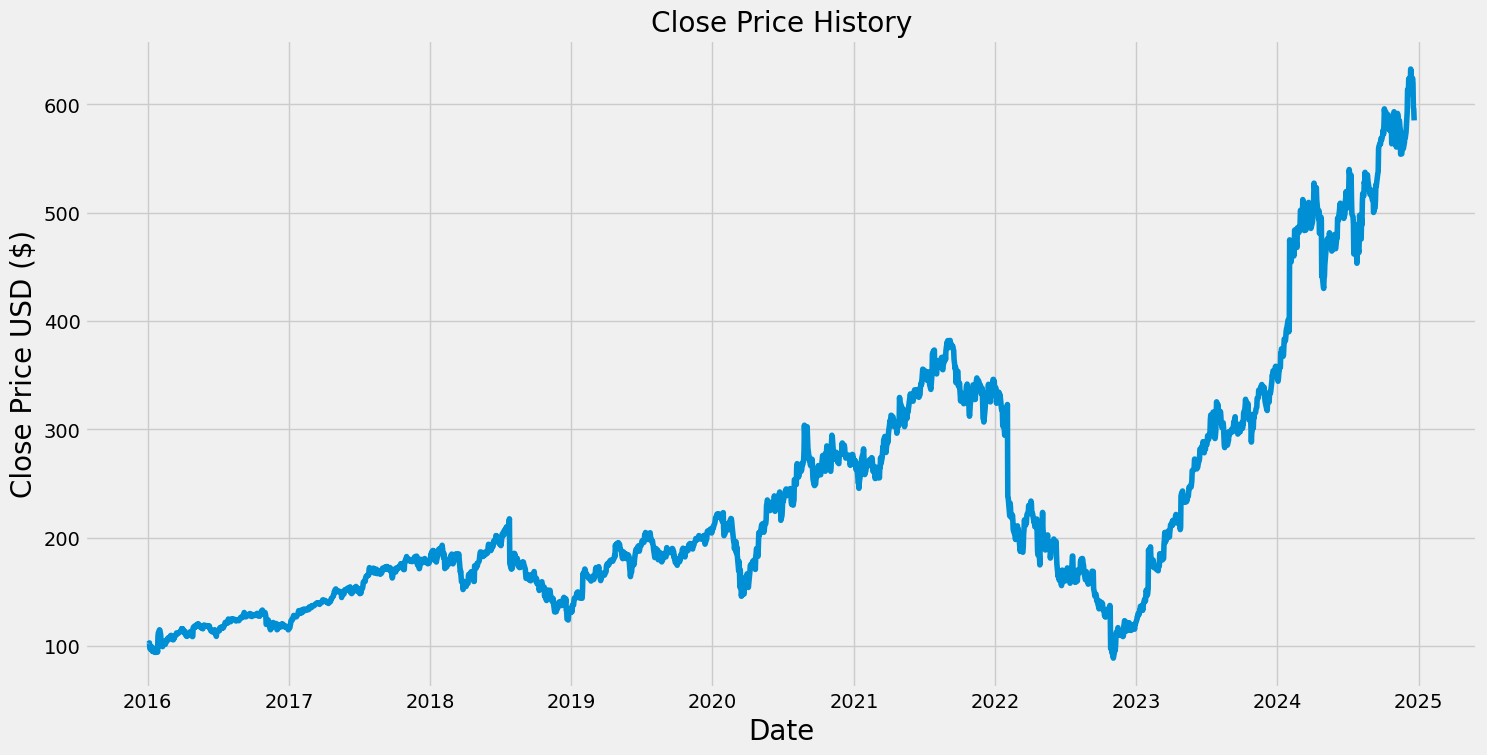

In [15]:
# Visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.show()

In [16]:
# Create a new dataframe with only the "Close column"
data = df[['Close']]
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1807

In [17]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02447726],
       [0.02541516],
       [0.02585652],
       ...,
       [0.93473345],
       [0.93175426],
       [0.91277563]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.02447726, 0.02541516, 0.02585652, 0.0165695 , 0.01548448,
       0.01581551, 0.01923607, 0.01200875, 0.01739706, 0.01114441,
       0.01167773, 0.01000422, 0.00965482, 0.01660628, 0.014896  ,
       0.01550286, 0.01018812, 0.03714805, 0.04284899, 0.04814534,
       0.04726262, 0.04373172, 0.03968589, 0.02787943, 0.01993489,
       0.0195487 , 0.02223366, 0.02390717, 0.02409107, 0.02335546,
       0.02995751, 0.02677602, 0.02879893, 0.03356198, 0.03043565,
       0.03304705, 0.03523548, 0.03495962, 0.03312061, 0.03845375,
       0.03869282, 0.03801239, 0.03582396, 0.0309322 , 0.03129999,
       0.03420564, 0.03385622, 0.03769976, 0.03858248, 0.04001691,
       0.04279382, 0.04066056, 0.04145134, 0.04218695, 0.04292255,
       0.04345587, 0.04439377, 0.04557074, 0.05007631, 0.04742813])]
[0.04632472427855591]

[array([0.02447726, 0.02541516, 0.02585652, 0.0165695 , 0.01548448,
       0.01581551, 0.01923607, 0.01200875, 0.01739706, 0.01114441,
       0.01167773, 0.01000422, 0.00

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1747, 60, 1)

In [ ]:
# Building the LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1747/1747 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.0016


In [ ]:
# Create a testing data set
# Create a new array that contains the scaled values
test_data = scaled_data[training_data_len - 60: , : ]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
# Convert the data into a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data into 3D
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Get the predicted price values from the model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

11.59197912639488

<ipython-input-205-226fb610b0d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predictions


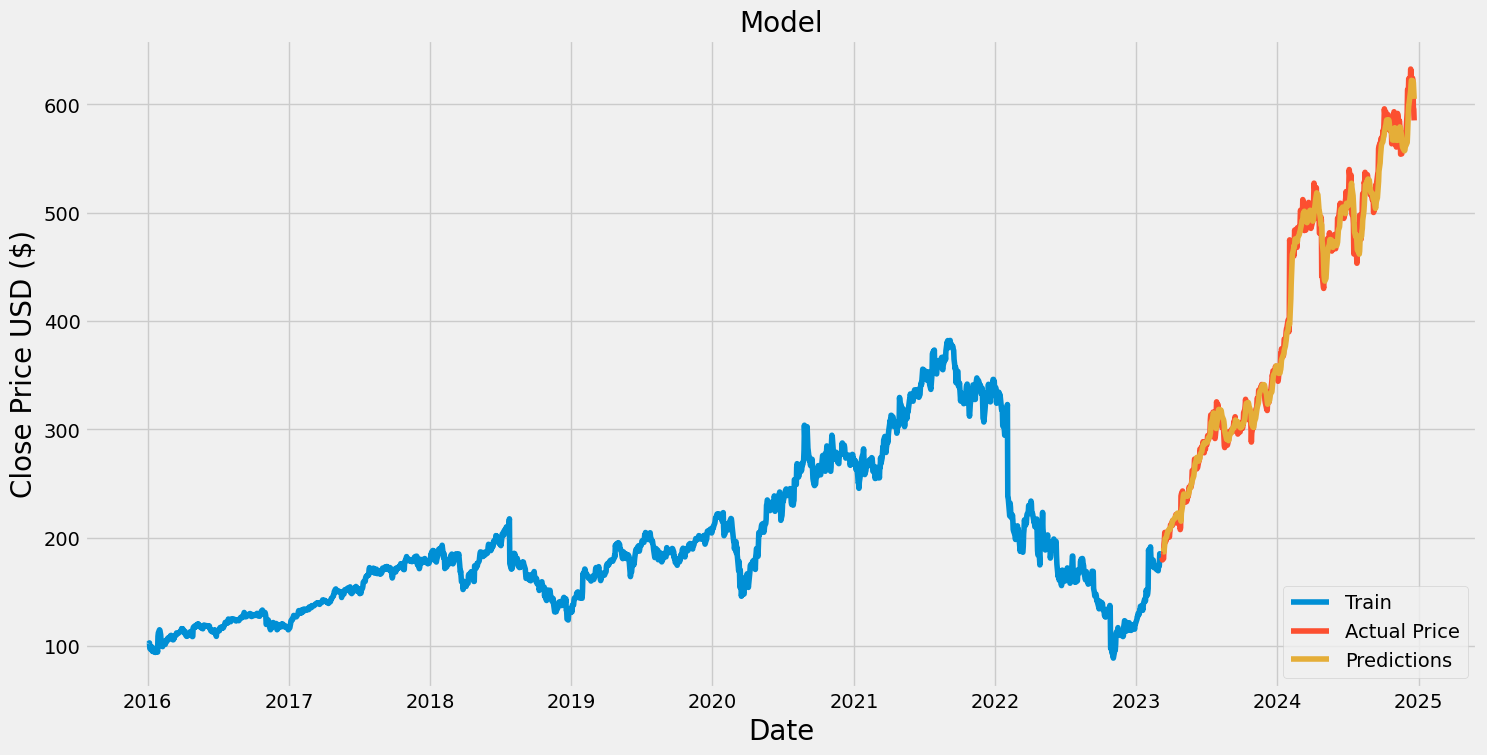

In [ ]:
# Plotting the data
train_data = data[:training_data_len]
valid_data = data[training_data_len:]
valid_data['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(train_data['Close'])
plt.plot(valid_data[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Price', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid_data

Price,Close,Predictions
Ticker,META,
Date,,
2023-03-09,181.690002,187.533478
2023-03-10,179.509995,187.735886
2023-03-13,180.899994,187.136902
2023-03-14,194.020004,186.949219
2023-03-15,197.750000,190.472305
...,...,...
2024-12-16,624.239990,621.568420
2024-12-17,619.440002,621.719788


In [ ]:
# Get the quote
quote = yf.download("META", start="2016-01-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))
# Create a new dataframe
new_df = pd.DataFrame(quote)
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:][['Close']].values
# Scale the values to be between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# Get the predicted scale price
predicted_price = model.predict(X_test)
# Undo the scaling
predicted_price = scaler.inverse_transform(predicted_price)

# The price our model predicts for the next day
print(predicted_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[596.6665]]


In [ ]:
# Get the quote
real_quote = yf.download("META", start=pd.Timestamp.today().strftime('%Y-%m-%d'), end=pd.Timestamp.today().strftime('%Y-%m-%d'))
# The Actual Price at Closing
print(real_quote['Close'])

[*********************100%***********************]  1 of 1 completed

Ticker        META
Date              
2024-12-20  585.25
